In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [54]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,03/07/2020,3,7,2020,186,33,Afghanistan,AF,AFG,38041757.0,Asia
1,02/07/2020,2,7,2020,319,28,Afghanistan,AF,AFG,38041757.0,Asia
2,01/07/2020,1,7,2020,279,13,Afghanistan,AF,AFG,38041757.0,Asia
3,30/06/2020,30,6,2020,271,12,Afghanistan,AF,AFG,38041757.0,Asia
4,29/06/2020,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
27395,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27396,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
27397,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27398,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


In [55]:
covid.to_csv('covid_data.csv')

In [56]:
covid.drop("countryterritoryCode",axis=1,inplace=True)
covid.drop("day",axis=1,inplace=True)
covid.drop("month",axis=1,inplace=True)
covid.drop("year",axis=1,inplace=True)
covid.drop("popData2019",axis=1,inplace=True)

In [57]:
covid.drop("geoId",axis=1,inplace=True)
covid

,dateRep,cases,deaths,countriesAndTerritories,continentExp
0,03/07/2020,186,33,Afghanistan,Asia
1,02/07/2020,319,28,Afghanistan,Asia
2,01/07/2020,279,13,Afghanistan,Asia
3,30/06/2020,271,12,Afghanistan,Asia
4,29/06/2020,351,18,Afghanistan,Asia
...,...,...,...,...,...
27395,25/03/2020,0,0,Zimbabwe,Africa
27396,24/03/2020,0,1,Zimbabwe,Africa
27397,23/03/2020,0,0,Zimbabwe,Africa
27398,22/03/2020,1,0,Zimbabwe,Africa


In [58]:
covid.rename(columns={'dateRep':'date','countriesAndTerritories':'country', 'continentExp':'continent'}, inplace=True)

In [59]:
covid

,date,cases,deaths,country,continent
0,03/07/2020,186,33,Afghanistan,Asia
1,02/07/2020,319,28,Afghanistan,Asia
2,01/07/2020,279,13,Afghanistan,Asia
3,30/06/2020,271,12,Afghanistan,Asia
4,29/06/2020,351,18,Afghanistan,Asia
...,...,...,...,...,...
27395,25/03/2020,0,0,Zimbabwe,Africa
27396,24/03/2020,0,1,Zimbabwe,Africa
27397,23/03/2020,0,0,Zimbabwe,Africa
27398,22/03/2020,1,0,Zimbabwe,Africa


In [60]:
covid1 = covid.iloc[::-1]
covid1

,date,cases,deaths,country,continent
27399,21/03/2020,1,0,Zimbabwe,Africa
27398,22/03/2020,1,0,Zimbabwe,Africa
27397,23/03/2020,0,0,Zimbabwe,Africa
27396,24/03/2020,0,1,Zimbabwe,Africa
27395,25/03/2020,0,0,Zimbabwe,Africa
...,...,...,...,...,...
4,29/06/2020,351,18,Afghanistan,Asia
3,30/06/2020,271,12,Afghanistan,Asia
2,01/07/2020,279,13,Afghanistan,Asia
1,02/07/2020,319,28,Afghanistan,Asia


In [61]:
covid1.head()

,date,cases,deaths,country,continent
27399,21/03/2020,1,0,Zimbabwe,Africa
27398,22/03/2020,1,0,Zimbabwe,Africa
27397,23/03/2020,0,0,Zimbabwe,Africa
27396,24/03/2020,0,1,Zimbabwe,Africa
27395,25/03/2020,0,0,Zimbabwe,Africa


In [62]:
country_wise = covid1.groupby(["country"]).sum()
country_wise

,cases,deaths
country,,
Afghanistan,32022,807
Albania,2662,69
Algeria,14657,928
Andorra,855,52
Angola,315,17
...,...,...
Vietnam,355,0
Western_Sahara,461,1
Yemen,1221,325


In [63]:
k=country_wise.nlargest(10, ['cases']) 
k

,cases,deaths
country,,
United_States_of_America,2739879,128740
Brazil,1496858,61884
Russia,661165,9683
India,625544,18213
Peru,292004,10045
Chile,284541,5920
United_Kingdom,283757,43995
Spain,250103,28368
Italy,240961,34818


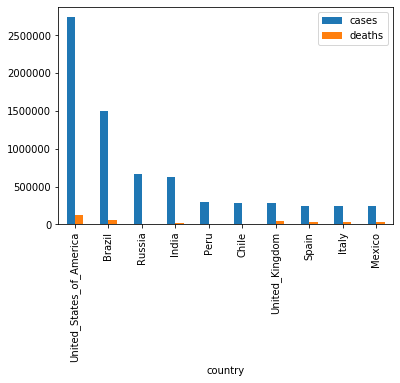

In [64]:
k.plot.bar()
plt.savefig("Top 10 countries in COVID-19 cases.png")

In [65]:
k.iloc[2]

cases     661165
deaths      9683
Name: Russia, dtype: int64

In [66]:
l=country_wise.nlargest(10, ['deaths'])
l

,cases,deaths
country,,
United_States_of_America,2739879,128740
Brazil,1496858,61884
United_Kingdom,283757,43995
Italy,240961,34818
France,166378,29875
Mexico,238511,29189
Spain,250103,28368
India,625544,18213
Iran,232863,11106


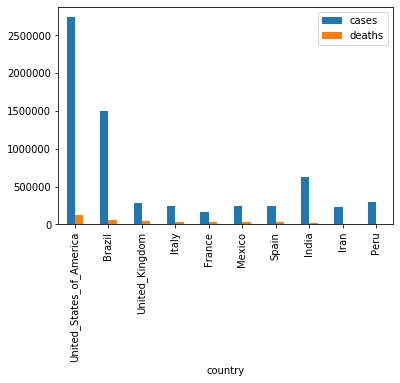

In [67]:
l.plot.bar()
plt.savefig("Top 10 countries in COVID-19 deaths.png")